In [141]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

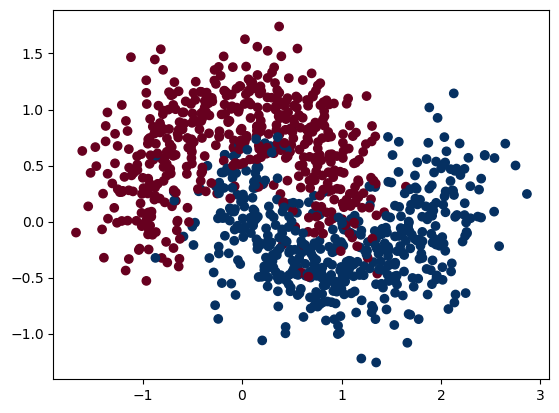

In [136]:
# ex 1

X, y = make_moons(n_samples=1000,
                  noise=0.3,
                  random_state=42)

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdBu);

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [137]:
# ex 2

class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()
        '''
        self.layer_1 = nn.ReLU(nn.Linear(in_features=2, out_features=10))
        self.layer_2 = nn.ReLU(nn.Linear(in_features=10, out_features=10))
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        '''
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_1 = MoonModel().to(device)

In [138]:
# ex 3

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.5)


In [139]:
# ex 4
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000
for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69461, Acc: 41.88% | Test Loss: 0.68951, Test Acc: 59.00%
Epoch: 100 | Loss: 0.29620, Acc: 87.50% | Test Loss: 0.29619, Test Acc: 85.00%
Epoch: 200 | Loss: 0.26966, Acc: 89.38% | Test Loss: 0.27707, Test Acc: 89.00%
Epoch: 300 | Loss: 0.23179, Acc: 90.50% | Test Loss: 0.21795, Test Acc: 91.50%
Epoch: 400 | Loss: 0.21426, Acc: 90.38% | Test Loss: 0.19544, Test Acc: 93.00%
Epoch: 500 | Loss: 0.21002, Acc: 90.62% | Test Loss: 0.18873, Test Acc: 93.00%
Epoch: 600 | Loss: 0.20338, Acc: 91.25% | Test Loss: 0.18055, Test Acc: 93.50%
Epoch: 700 | Loss: 0.20283, Acc: 91.38% | Test Loss: 0.17929, Test Acc: 93.50%
Epoch: 800 | Loss: 0.20060, Acc: 91.25% | Test Loss: 0.17686, Test Acc: 93.00%
Epoch: 900 | Loss: 0.21766, Acc: 90.88% | Test Loss: 0.19214, Test Acc: 93.00%


helper_functions.py already exists, skipping download


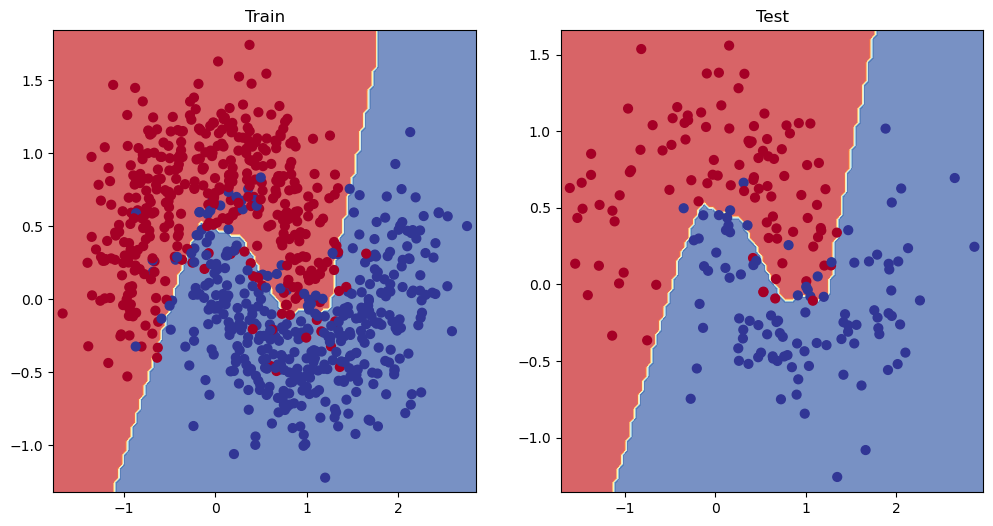

In [140]:
# ex 5
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) 

In [ ]:
# ex 6
def tanh(z):
    return ((np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)))

0.9950547536867306


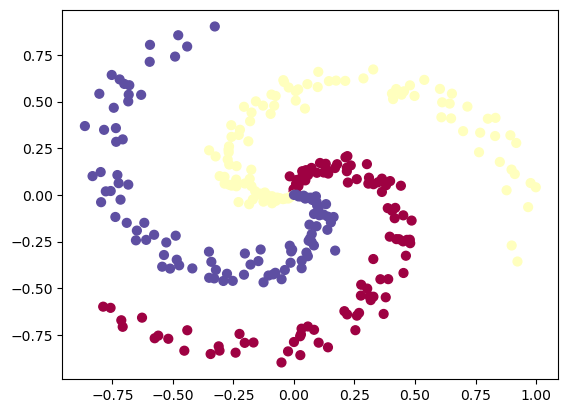

In [ ]:
# ex 7
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()